In [1]:
# import all the necessary modules
import os
import numpy as np
import matplotlib.pyplot as plt
import mne

In [2]:
# Step 1: load the dataset and return the directory path to the dataset
# Note: in case the data is not found in the expected locations, it will download the dataset
sample_data_folder = mne.datasets.sample.data_path()

# Step 2: os.path.join() constructs a pathname by concatenating the strings passed
sample_data_raw_file = os.path.join(sample_data_folder, 'MEG', 'sample', 'sample_audvis_filt-0-40_raw.fif')

# Step 3: Load the dataset from the raw data file
raw = mne.io.read_raw_fif(sample_data_raw_file)

Opening raw data file /home/aditya/Projects/ai/eeg/src/mne_test/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.


In [3]:
print(raw)
print(raw.info)

<Raw | sample_audvis_filt-0-40_raw.fif, 376 x 41700 (277.7 s), ~3.3 MB, data not loaded>
<Info | 15 non-empty values
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 GRAD, 102 MAG, 9 STIM, 60 EEG, 1 EOG
 custom_ref_applied: False
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 40.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off, Average EEG reference: off
 sfreq: 150.2 Hz
>


Effective window size : 13.639 (s)
Effective window size : 13.639 (s)
Effective window size : 13.639 (s)


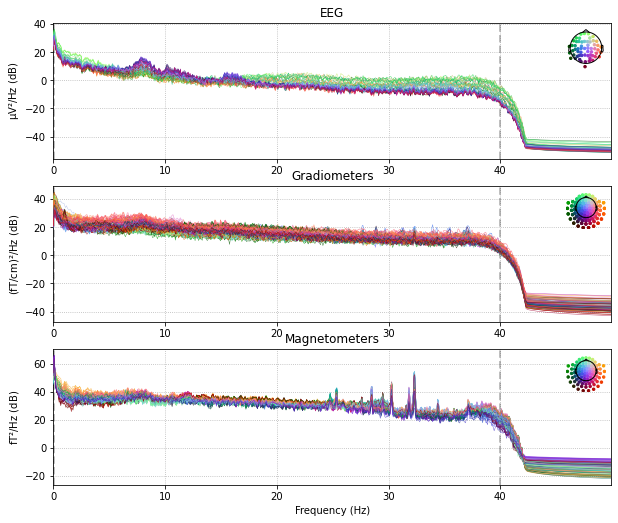

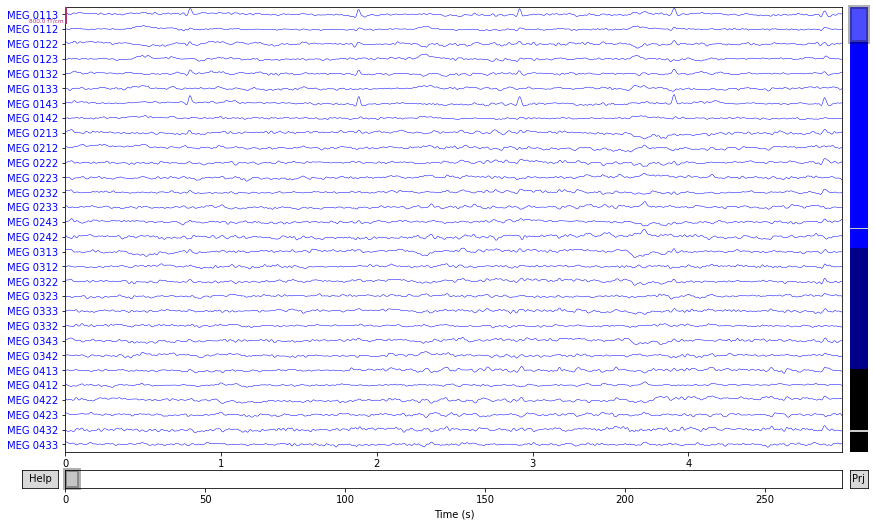

In [4]:
# Plots the power spectral density for each sensor type - EEG, Gradiometer, Magnetometer
# We are plotting till 50 Hz since we have a signal containing frequencies upto 40 Hz
raw.plot_psd(fmax=50)

# Plot the raw data for 30 MEG channels for a time window of 5 seconds
raw.plot(duration=5, n_channels=30)
plt.show()

Fitting ICA to data using 364 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 6.2s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


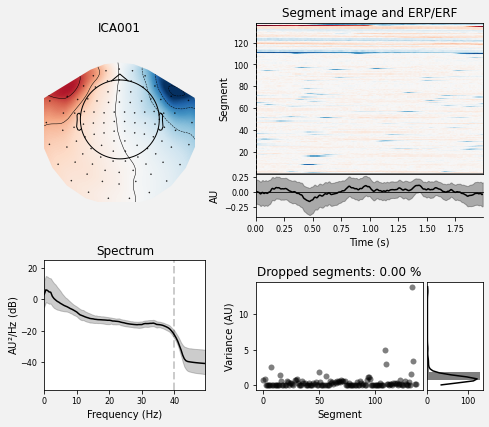

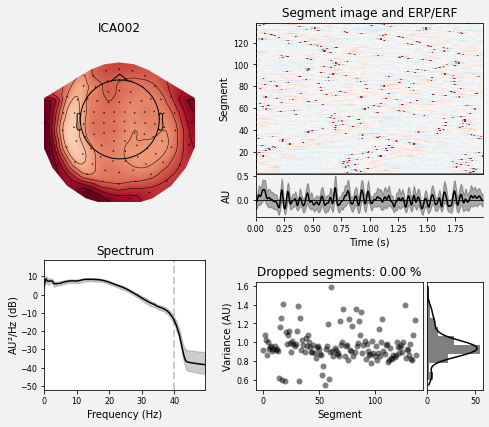

[<Figure size 504x432 with 6 Axes>, <Figure size 504x432 with 6 Axes>]

In [5]:
# Preprocessing using ICA (Independent Component Analysis)
# ICA: You are given a set of recordings and want to estimate independent source signals that have been mixed to
# make the recordings. IN EEG/MEG data, there are sources like blinks, heartbeats, etc that must be separated
# to remove any unwanted artifacts

# Step 1: Define the ICA object
ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
# Step 2: Fit the ICA object to the given raw data
ica.fit(raw)
# Step 3: Exclude the sources that you do not want in the final reconstructed signal
ica.exclude = [1, 2] 
ica.plot_properties(raw, picks=ica.exclude)

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 2 ICA components
    Projecting back using 364 PCA components


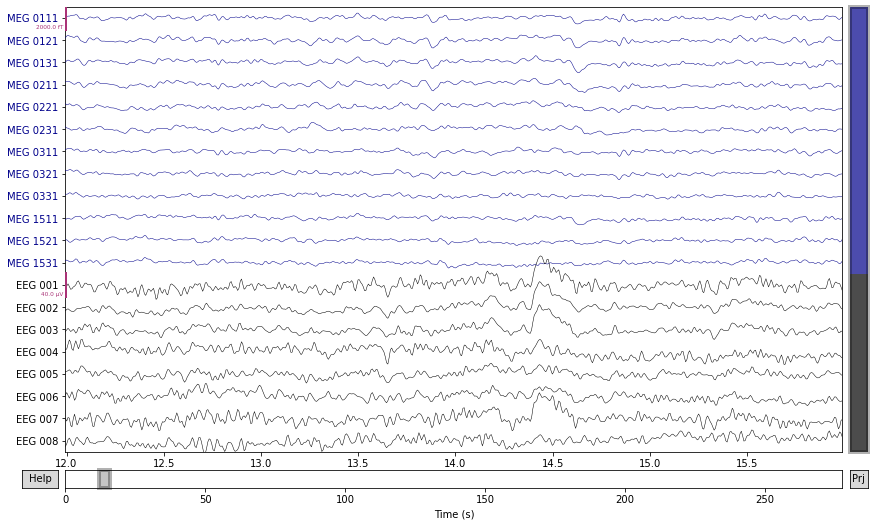

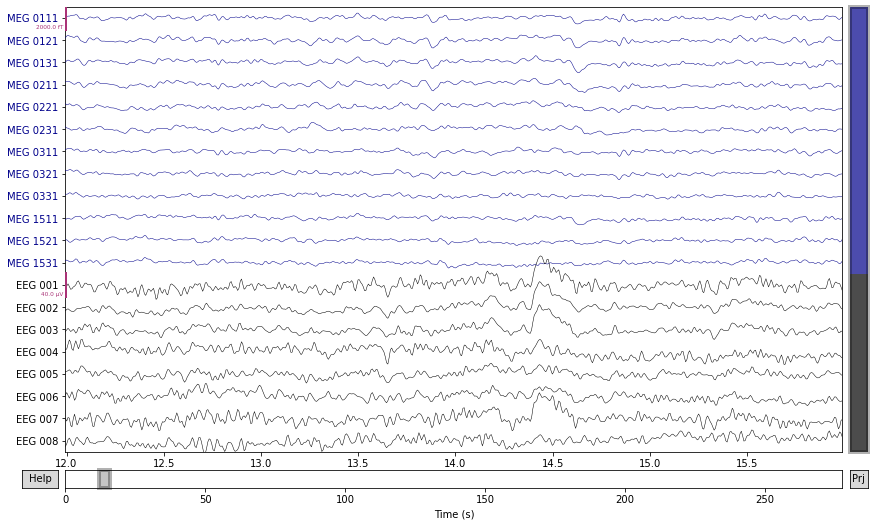

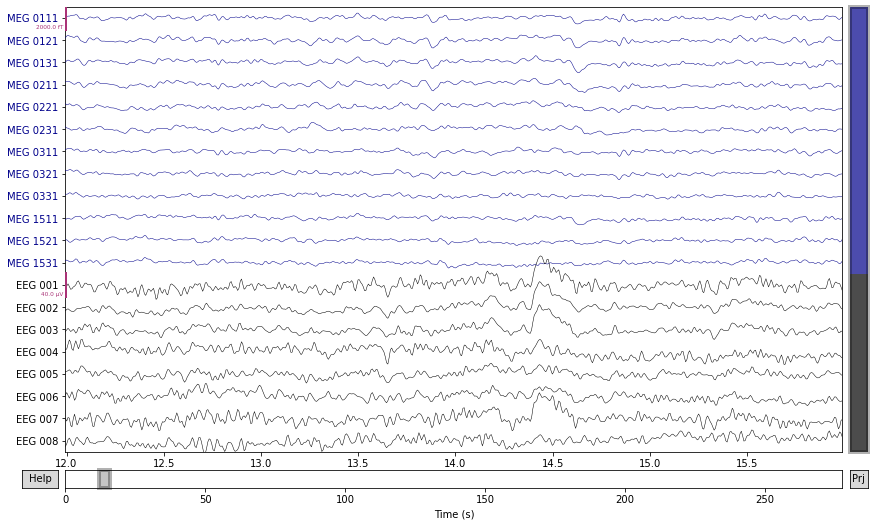

In [7]:
# Recover the reconstructed signal after excluding the undesired components
orig_raw = raw.copy()

# ICA is applied to the raw signal which must be loaded into memory
raw.load_data()
ica.apply(raw)

# Show some frontal channels to clearly illustrate the artifact removal
chs = ['MEG 0111', 'MEG 0121', 'MEG 0131', 'MEG 0211', 'MEG 0221', 'MEG 0231',
       'MEG 0311', 'MEG 0321', 'MEG 0331', 'MEG 1511', 'MEG 1521', 'MEG 1531',
       'EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 005', 'EEG 006',
       'EEG 007', 'EEG 008']
chan_idxs = [raw.ch_names.index(ch) for ch in chs]
# We will also plot the original data for comparison
orig_raw.plot(order=chan_idxs, start=12, duration=4)
raw.plot(order=chan_idxs, start=12, duration=4)